# ML Course 1 - Practice (solution)

## Import libraries

Better to do it before any further work.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Original data set

<center> <img src="titanic.png" width=400/> </center>

*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

You can have a quick view on the original data set, but keep in mind that you will not have to work on this exact version today.

In [3]:
dataset = pd.read_csv('Titanic.csv')

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,NaN,Adult,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C,Adult,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,NaN,Adult,Not Mother
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C,Adult,Not Mother
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,NaN,Adult,Not Mother


## Simplified data set

To start will a more simple date set, we provide a simplified version of the Titanic data set with only the following variables:

| Variable | Definition | Key |
|---|---|---|
| Embarked | Port of Embarkation | 0 = Cherbourg, 1 = Queenstown, 2 = Southampton |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Fare | Passenger fare |  |
| Sex | Sex | 0 = male, 1 = female |
| Age | Age in years |  |
| Survived | Survival | 0 = No, 1 = Yes |

In [5]:
dataset = pd.read_csv('titanic_simplified.csv')

In [6]:
dataset.head()

,Embarked,Pclass,Fare,Sex,Age,Survived
0,2,3,7.2500,0,22.0,0
1,0,1,71.2833,1,38.0,1
2,2,3,7.9250,1,26.0,1
3,2,1,53.1000,1,35.0,1
4,2,3,8.0500,0,35.0,0


Your mission is to explore the data set and extract some information to answer this open question:
**“what sorts of people were more likely to survive?”**

Here are some computations to do on the data set (you are free to make extra tests and exploration on your own):
* General information:
 * Number of passengers
 * Mean age of the passengers
 * Number of passengers above 70 years old
 * Proportion of each class of passenger
 * Age distribution of the passengers depending on the port of embarkment (density plots)
 * Fare vs. age (scatter plot)
* Information linked to survival:
 * Age distribution of the passengers who survided/did not survive (histogram)
 * Repartition of survivals among men and women (stacked bars)
 * Repartition of survivals for each class (stacked bars)
 
How do you interpret the results of your exploration?

In [8]:
dataset.isna().sum()

Embarked    0
Pclass      0
Fare        0
Sex         0
Age         0
Survived    0
dtype: int64

## Suggestion of solution

### Number of passengers

In [9]:
nb_passengers = len(dataset)
print(nb_passengers)

891


### Mean age of the passengers

In [10]:
dataset['Age'].mean()

29.789191919191918

### Number of passengers above 70 years old

In [11]:
# Method 1
(dataset['Age'] > 70).sum()

8

In [10]:
# Method 2
len(dataset[dataset['Age'] > 70])

8

### Proportion of each class of passenger

In [11]:
print(dataset['Pclass'].unique())

[3 1 2]


In [12]:
# Method 1
for i in dataset['Pclass'].unique():
    print('Proportion of passengers of class ' + str(i) + ' is ' + str((dataset['Pclass'] == i).sum() / nb_passengers))

Proportion of passengers of class 3 is 0.5510662177328844
Proportion of passengers of class 1 is 0.24242424242424243
Proportion of passengers of class 2 is 0.20650953984287318


In [13]:
# Method 2
dataset.value_counts('Pclass', normalize = True)

Pclass
3    0.551066
1    0.242424
2    0.206510
dtype: float64

### Age distribution of the passengers depending on the port of embarkment (density plots)

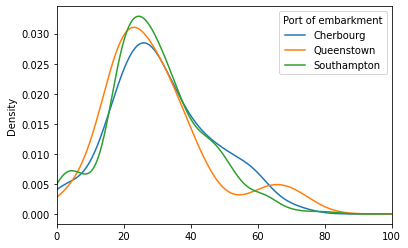

In [14]:
dataset[dataset['Embarked'] == 0]['Age'].plot(kind = 'density', label = 'Cherbourg')
dataset[dataset['Embarked'] == 1]['Age'].plot(kind = 'density', label = 'Queenstown')
dataset[dataset['Embarked'] == 2]['Age'].plot(kind = 'density', label = 'Southampton')
plt.legend(title = 'Port of embarkment')
plt.xlim(0,100)
plt.show()

### Fare vs. age (scatter plot)

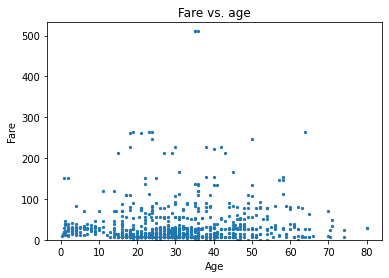

In [15]:
plt.scatter(dataset['Age'], dataset['Fare'], s=5)
plt.ylim(0, dataset['Fare'].max() + 20)
plt.title("Fare vs. age")
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

### Age distribution of the passengers who survided/did not survive (histogram)

(0.0, 80.0)

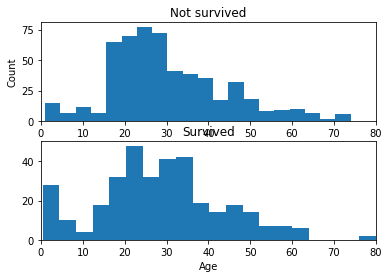

In [38]:
ax1 = plt.subplot(211)
plt.hist(dataset[dataset['Survived'] == 0]['Age'], bins=20)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Not survived')
plt.xlim(0,80)
ax2 = plt.subplot(212)
plt.hist(dataset[dataset['Survived'] == 1]['Age'], bins=20)
plt.xlabel('Age')
plt.title('Survived')
plt.xlim(0,80)

### Repartition of survivals among men and women (stacked bars)

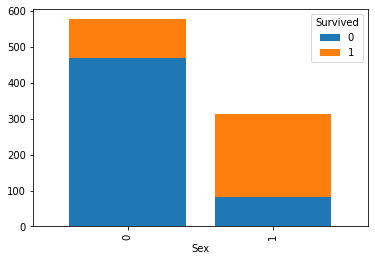

In [17]:
survival_vs_sex = dataset.groupby(['Survived','Sex']).size().reset_index().pivot(index='Sex', columns='Survived', values=0)
survival_vs_sex.plot(kind='bar', stacked=True, width=0.8)
plt.show()

### Repartition of survivals for each class (stacked bars)

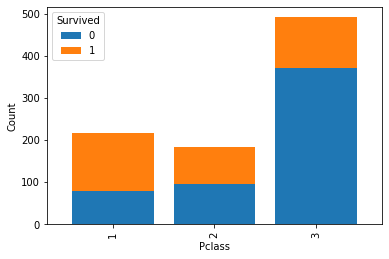

In [18]:
survival_vs_class = dataset.groupby(['Survived','Pclass']).size().reset_index().pivot(index='Pclass', columns='Survived', values=0)
survival_vs_class.plot(kind='bar', stacked=True, width=0.8)
plt.ylabel('Count')
plt.show()

Bonus: plot the percentage stacked bars

survival_vs_class: 
 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119 

survival_vs_class_percentages: 
 Survived    0    1
Pclass            
1         NaN  NaN
2         NaN  NaN
3         NaN  NaN 

survival_vs_class_percentages: 
 Survived         0         1
Pclass                      
1          0.37037   0.62963
2         0.527174  0.472826
3         0.757637  0.242363 



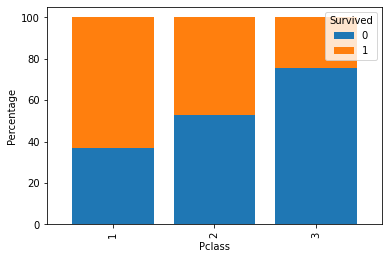

In [19]:
# Check what is in survival_vs_class
print('survival_vs_class: \n', survival_vs_class, '\n')

# Create empty dataframe with same structure as survival_vs_class
survival_vs_class_percentages = pd.DataFrame(index=survival_vs_class.index, columns=survival_vs_class.columns)
print('survival_vs_class_percentages: \n', survival_vs_class_percentages, '\n')

# Fill it with normalized rows of survival_vs_class
for i in range(len(survival_vs_class)):
    survival_vs_class_percentages.iloc[i,:] = survival_vs_class.iloc[i,:] / survival_vs_class.iloc[i,:].sum() 
print('survival_vs_class_percentages: \n', survival_vs_class_percentages, '\n')

# Plot the percent stacked bars
(survival_vs_class_percentages*100).plot(kind='bar', stacked=True, width=0.8)
plt.ylabel('Percentage')
plt.show()

You have higher chances of survival when you are a children, a woman, with a first class ticket. The criteria that looks the most significant for survival is the gender.